In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.misc import imread

In [3]:
path='C:/Users/user/Desktop/neat codes/iit delhi'

In [5]:
os.listdir(path)



['.ipynb_checkpoints', 'skillenza.ipynb', 'solution.csv', 'training']

In [10]:
#some of the images
files=os.listdir(f'{path}/training')

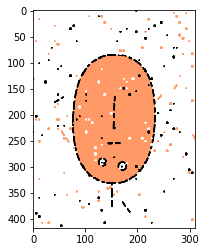

In [48]:
#
img=plt.imread(f'{path}/training/{files[0]}')
plt.imshow(img)

In [49]:
img.shape

(418, 311, 3)

In [2]:
import keras

C:\Users\user\Anaconda4\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [4]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense,Dropout,SpatialDropout2D
from keras.models import Sequential

from keras.constraints import max_norm

In [5]:

WIDTH = 250
HEIGHT = 240
DEPTH = 3
input_shape = (WIDTH, HEIGHT, DEPTH)
EPOCHS = 15
INIT_LR = 1e-4
BS = 32

In [113]:
input_shape

(128, 128, 3)

In [11]:
def readTrainData(trainDir):
    data = []
    labels = []
    # loop over the input images
    dirs = os.listdir(trainDir) 
    for dir in dirs:
        absDirPath = os.path.join(os.path.sep,trainDir, dir)
        images = os.listdir(absDirPath)
        for imageFileName in images:
            # load the image, pre-process it, and store it in the data list
            imageFullPath = os.path.join(trainDir, dir, imageFileName)
            #print(imageFullPath)
            img = load_img(imageFullPath)
            arr = img_to_array(img)  # Numpy array with shape (233,233,3)
            arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
            #print(arr.shape) 
            data.append(arr)
            label = classes_to_int(dir)
            labels.append(label)
    return data, labels


In [24]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [6]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)


True

In [10]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'solution.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir, 'sample.csv'))


In [11]:
train['id']=train['id'].astype('str')

In [12]:
train['id']=train['id']+'.png'

In [8]:
train['category'].unique()

array([5, 4, 6, 2, 3, 1], dtype=int64)

C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


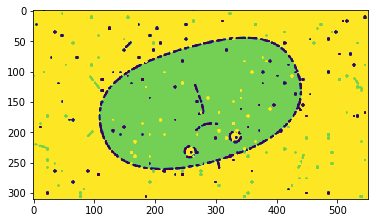

In [29]:
img_name = rng.choice(train.id)
filepath = os.path.join(data_dir, 'Train', 'Images', 'training', img_name)

img = imread(filepath, flatten=True)

plt.imshow(img)

plt.show()

In [13]:
temp = []
for img_name in train.id:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'training', img_name)
    img = imread(image_path)
  
    arr = img_to_array(img)  # Numpy array with shape (233,233,3)
    arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
    temp.append(arr)

C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [ ]:
train_x = np.stack(temp)


train_x /= 255.0


In [15]:
train_y = keras.utils.np_utils.to_categorical(train.category.values)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)


In [7]:
model = Sequential()
from keras import optimizers


In [8]:


epochs = 5
batch_size =50

# import keras modules

from keras.models import Sequential
from keras.layers import Dense

# create model

model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(250,240,3), data_format='channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_constraint=max_norm(2.)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_constraint=max_norm(2.)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=7, activation='softmax'))
opt = optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# compile the model with necessary attributes


C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`


In [9]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [1]:
trained_model = model.fit(X_train, y_train, nb_epoch=6, batch_size=300, validation_data=(X_test, y_test))

NameError: name 'model' is not defined

In [1]:
train_x.shape

NameError: name 'train_x' is not defined

In [30]:
train_y.shape

(3500, 7)

In [23]:
len(val_x)

1500

In [24]:
len(val_y)

1500

In [23]:
from keras.preprocessing import image

In [11]:
#pre trained order
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [16]:
model = ResNet50(weights='imagenet')

In [25]:
resnet = []
for img_name in train.id:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'training', img_name)
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
  
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    resnet.append(x)